# Problema

Predecir el coste del seguro

## Instrucciones

 Utilizar el dataset (insurance.csv) para entrenar un modelo de regresión capaz de predecir el valor del seguro en función de las características del cliente. Realizar limpieza, preprocesado modelado y testeo del modelo aportando conclusiones de todos estos pasos.

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [ ]:
# imports
import pandas as pd


In [ ]:
ruta = "insurance.csv"
data = pd.read_csv('/content/insurance.csv')

In [ ]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape

(1338, 7)

# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos (lipieza, nans, escalado...)

* Valorar diferentes modelos de regresión (linear regressor, polynomial, ridge, lasso, elastic, decission tree y random forest)

* Comparación entre modelos (dividir el dataset en train y test, entrenar con el train y evaluar con el test)

* Métricas (todas, y que aporta cada una)

* Conclusiones finales

## Implementación

In [ ]:
## A completar

Procesamiento del dato

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print(data.isnull().sum())  # Muestra cuántos NaNs hay en cada columna


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
# Separar variables numéricas y categóricas
numericas = data.select_dtypes(include=["int64", "float64"]).columns
categoricas = data.select_dtypes(include=["object", "category"]).columns

print("Variables numéricas:", numericas.tolist())
print("Variables categóricas:", categoricas.tolist())


Variables numéricas: ['age', 'bmi', 'children', 'charges']
Variables categóricas: ['sex', 'smoker', 'region']


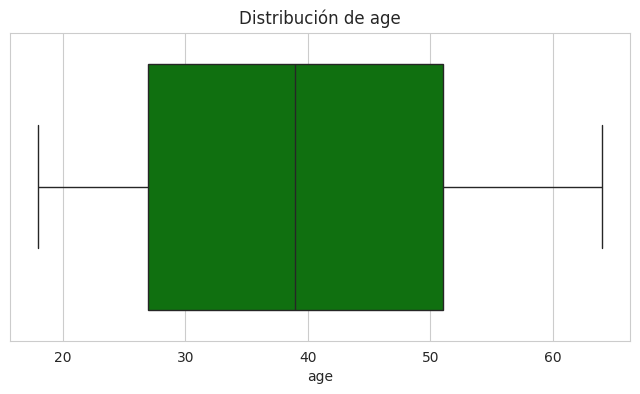

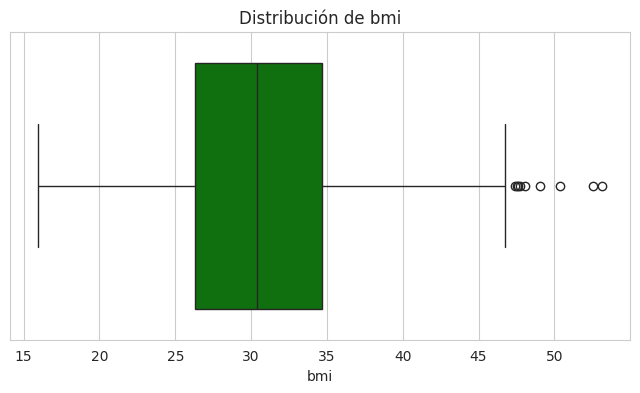

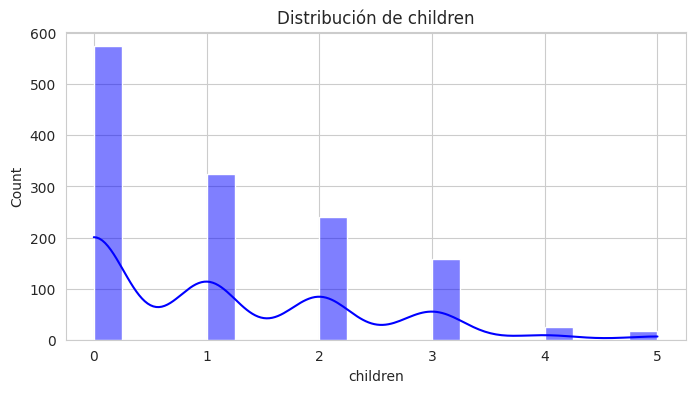

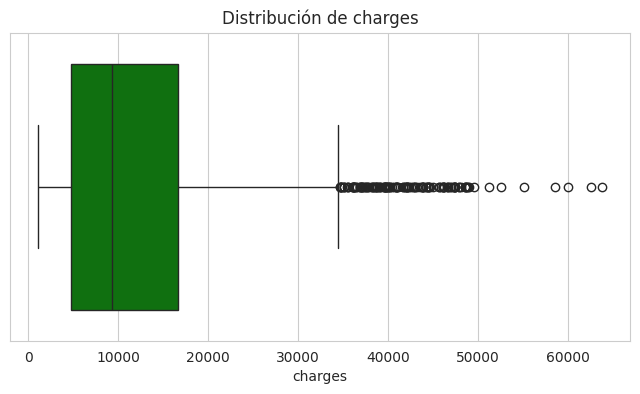

<ipython-input-12-fb38f0cb2945>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], data=data, palette="viridis")


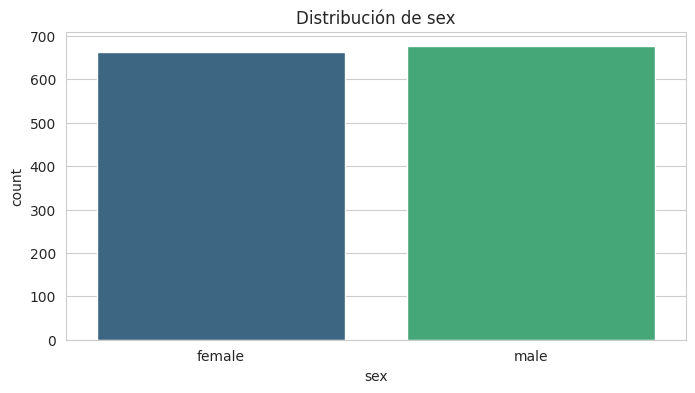

<ipython-input-12-fb38f0cb2945>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], data=data, palette="viridis")


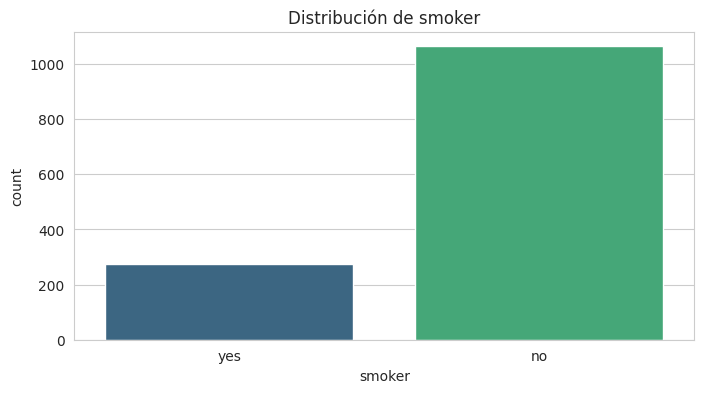

<ipython-input-12-fb38f0cb2945>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], data=data, palette="viridis")


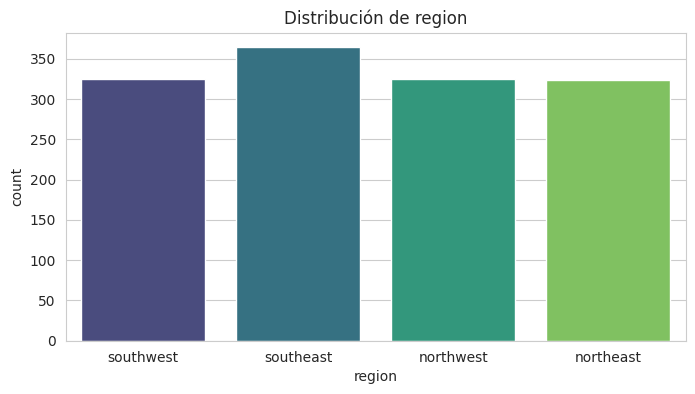

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de estilo
sns.set_style("whitegrid")

# Crear gráficos para variables numéricas
for col in numericas:
    plt.figure(figsize=(8, 4))

    # Si hay pocos valores únicos, usa un histograma con conteo
    if data[col].nunique() < 30:
        sns.histplot(data[col], bins=20, kde=True, color="blue")
    else:  # Si hay muchas variaciones, usar un boxplot
        sns.boxplot(x=data[col], color="green")

    plt.title(f"Distribución de {col}")
    plt.show()

# Crear gráficos para variables categóricas
for col in categoricas:
    plt.figure(figsize=(8, 4))

    # Si hay pocas categorías, usar un countplot
    if data[col].nunique() < 10:
        sns.countplot(x=data[col], data=data, palette="viridis")
    else:  # Si hay muchas categorías, usar barras horizontales
        data[col].value_counts().nlargest(10).plot(kind="barh", color="coral")

    plt.title(f"Distribución de {col}")
    plt.show()


Después de hacer el EDA, observamos que :    
- El sexo de las muestras está balanceado
- Hay bastantes menos fumadores que fumadores
- Las regiones de las muestras están balanceadas
- La mayoría de los cargos médicos adicionales són de menos de 18 mil
- La mayoría de las muestras no tienen hijos, 1 o 2 .
- El 75% de las muestras presenta un bmi superior a 25 ( es destacable, ya que el rango óptimo de bmi se encuentra entre 18.5 y 24.9).
- El 75% de las muestras tiene menos de 50 años.

#Normalización

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
# 1. Normalización de variables numéricas
scaler = MinMaxScaler()
data[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(data[['age', 'bmi', 'children', 'charges']])

#Codificación

In [ ]:
# 2. One-Hot Encoding de variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' evita colinealidad
categorical_features = ['sex', 'smoker', 'region']
encoded_features = encoder.fit_transform(data[categorical_features])

In [ ]:

# Convertir en DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Unir todo en un nuevo DataFrame
df_final = pd.concat([data.drop(columns=categorical_features), encoded_df], axis=1)

# Mostrar resultado
print(df_final)

           age       bmi  children   charges  sex_male  smoker_yes  \
0     0.021739  0.321227       0.0  0.251611       0.0         1.0   
1     0.000000  0.479150       0.2  0.009636       1.0         0.0   
2     0.217391  0.458434       0.6  0.053115       1.0         0.0   
3     0.326087  0.181464       0.0  0.333010       1.0         0.0   
4     0.304348  0.347592       0.0  0.043816       1.0         0.0   
...        ...       ...       ...       ...       ...         ...   
1333  0.695652  0.403820       0.6  0.151299       1.0         0.0   
1334  0.000000  0.429379       0.0  0.017305       0.0         0.0   
1335  0.000000  0.562012       0.0  0.008108       0.0         0.0   
1336  0.065217  0.264730       0.0  0.014144       0.0         0.0   
1337  0.934783  0.352704       0.0  0.447249       0.0         1.0   

      region_northwest  region_southeast  region_southwest  
0                  0.0               0.0               1.0  
1                  0.0               

# Split de los datos


In [ ]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df_final.drop(columns=['charges'])  # Variables de entrada
y = df_final['charges']  # Variable objetivo

# 1️⃣ Dividir entre Train (70%) y Test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2️⃣ Dividir Train en Train (80%) y Validation (20%) → Final: Train (56%), Val (14%), Test (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Mostrar tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de validación: {X_val.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (748, 8)
Tamaño del conjunto de validación: (188, 8)
Tamaño del conjunto de prueba: (402, 8)


#Modelado

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Lista de modelos a evaluar
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (Degree=2)": PolynomialFeatures(degree=2),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Función para evaluar modelos
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    if name.startswith("Polynomial"):  # Caso especial: Regresión Polinómica
        poly = PolynomialFeatures(degree=2)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Cálculo de métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n📌 {name}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

# 🟢 Evaluar todos los modelos
for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)


📌 Linear Regression
MAE: 0.07
MSE: 0.01
RMSE: 0.09
R²: 0.7701

📌 Polynomial Regression (Degree=2)
MAE: 0.04
MSE: 0.01
RMSE: 0.07
R²: 0.8622

📌 Ridge Regression
MAE: 0.06
MSE: 0.01
RMSE: 0.09
R²: 0.7697

📌 Lasso Regression
MAE: 0.14
MSE: 0.04
RMSE: 0.19
R²: -0.0001

📌 ElasticNet Regression
MAE: 0.13
MSE: 0.03
RMSE: 0.18
R²: 0.1292

📌 Decision Tree
MAE: 0.04
MSE: 0.01
RMSE: 0.07
R²: 0.8611

📌 Random Forest
MAE: 0.04
MSE: 0.01
RMSE: 0.07
R²: 0.8594


Tras probar diferentes modelos de regresión lineal, elijo el Polynomial Regression de grado 2, ya que ofrece el MAE más bajo, el RMSE más bajo, y el mejor R2.

# Conclusiones

Tras analizar el dataset, hacer un EDA sobre sus variables, normalizar las variables numéricas con MinMaxScaler, codificar las variables categóricas con One-Hot-Encoding y probar diferentes modelos para predecir el precio del seguro de una persona en función de sus características... he llegado a la conclusión de que el Polynomial Regressor de grado 2 es el más óptimo para este ejercicio, ya que nos ofrece mejores métricas que los otros.